In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline 


In [2]:
#importing the warning 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset 
df1=("C:\\Users\\DELL\\OneDrive\\Desktop\\internship data\\dataset.csv")


In [4]:
df1 = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\internship data\\dataset.csv")
missing_values = df1.isnull().sum()
print(missing_values)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Label2= task1:- 
Task: Table Booking and online delivery 
1. Determine the percentage of restaurants that offer table booking and online delivery.

In [6]:
#check for value counts
df1["Has Table booking"].value_counts()


Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [7]:
df1["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [8]:
print("Table Booking:",round((1158/(8393+1158))*100, 2),"%")
print("Online Delivery:",round((2451/(7100+2451))*100 ,2),"%")

Table Booking: 12.12 %
Online Delivery: 25.66 %


2. Compare the average ratings of restaurants with table booking and those without.

In [9]:
#Filter the DataFrame for rows with 'yes' & 'no' in the 'table booking' column
df_with_table_booking=df1[df1['Has Table booking']=='Yes']
df_without_table_booking=df1[df1['Has Table booking']=='No']

#After filtering rows with and without table booking
print("Rows with Table booking:",df_with_table_booking.shape)
print("Rows without Table booking:",df_without_table_booking.shape) 


Rows with Table booking: (1158, 21)
Rows without Table booking: (8393, 21)


In [10]:
#Average Rating of Restaurants
print("Average Ratings: ")
print("With Table booking: ",round(df_with_table_booking["Aggregate rating"].mean(),2))
print("Without Table booking: ",round(df_without_table_booking["Aggregate rating"].mean(),2))

Average Ratings: 
With Table booking:  3.44
Without Table booking:  2.56


3.Analyse the avilability  of online delivery among restautants with diffrent price ranges.


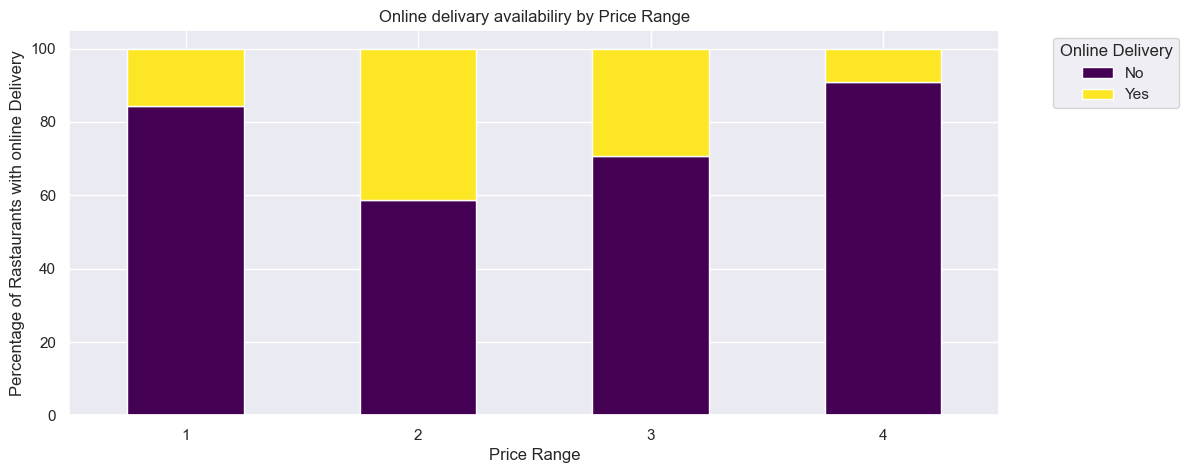

In [11]:
#Group by 'Price range'and claculate the percentage of restaurants with online delivery

Online_Delivery_by_price_range = df1.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
Online_Delivery_by_price_range.plot(kind='bar',stacked=True,colormap='viridis',figsize=(12,5))
plt.title('Online delivary availabiliry by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Rastaurants with online Delivery')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery',bbox_to_anchor=(1.05,1))
plt.show()

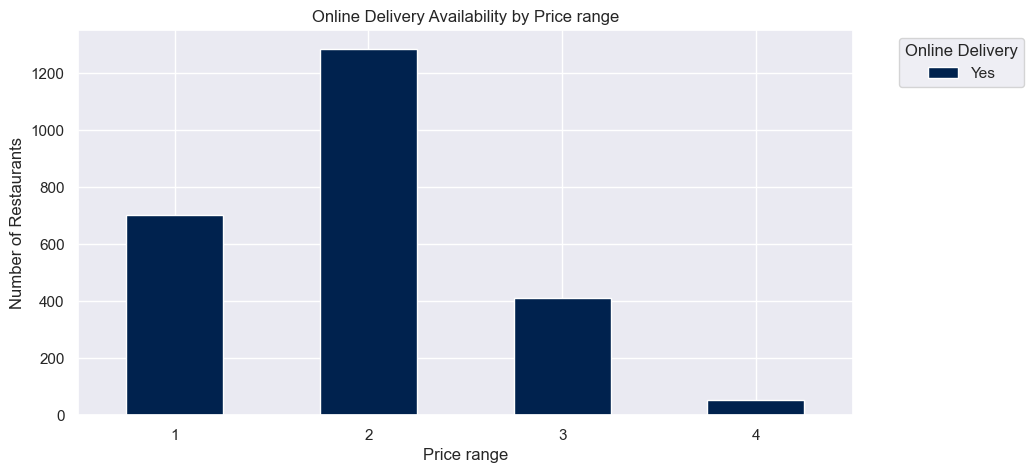

In [12]:
#Taking only those restaurants with online delivery available
Online_Delivery_Yes = df1[df1['Has Online delivery']=='Yes']

#Group by 'price range' and calculate the percentage of restaurants with online delivary

Online_Delivery_counts = Online_Delivery_Yes.groupby(['Price range','Has Online delivery']).size().unstack()
Online_Delivery_counts.plot(kind='bar', stacked=True, colormap='cividis',figsize=(10,5))
plt.title('Online Delivery Availability by Price range')
plt.xlabel('Price range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery',bbox_to_anchor=(1.05,1), loc='upper left')
plt.show() 

Level2 :- Task2
Price range analysis
1. Determine the most common price range among all the restaurants.

In [13]:
df1["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [14]:
most_common=df1["Price range"].mode()[0]
print("Most common price range among all the restaurants:",most_common)


Most common price range among all the restaurants: 1


2.Calculate the average rating for each price range
& identify the color that represents the highest avg rating among diffrence price range.


In [15]:
Avg_Rating_by_price_range =df1.groupby('Price range')['Aggregate rating'].mean().round(2)
print("Average rating for each price range:")
print(Avg_Rating_by_price_range)


Average rating for each price range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


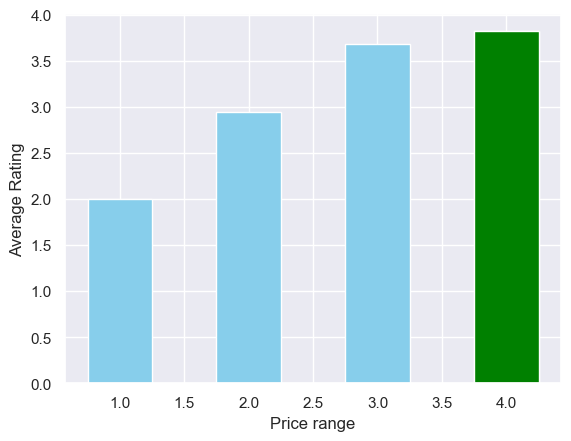

In [16]:
#find the price range with the highest overage rating
highest_avg_rating_color=Avg_Rating_by_price_range.idxmax()
plt.bar(Avg_Rating_by_price_range.index, Avg_Rating_by_price_range, color='skyblue',width=0.5)
plt.bar(highest_avg_rating_color, Avg_Rating_by_price_range[highest_avg_rating_color], color='green',width=0.5)
plt.xlabel('Price range')
plt.ylabel('Average Rating')
plt.title=('Average Rating by Price Range')
plt.show()

Label2:-Task3
Feature Engineering.

1.Extract additional features from the existing columns, such as the length of the restaurants name or address.

In [17]:
#extract the length of the restaurants name and address and create new columns
df1['Restaurant Name Length']=df1['Restaurant Name'].apply(lambda x:len(str(x)))
df1['Address Length']=df1['Address'].apply(lambda x:len(str(x)))


In [18]:
df1[['Restaurant Name','Restaurant Name Length','Address','Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


2. Create new features like "Has Table Booking" and "Has Online Delivery" by encoding categorical variables.

In [19]:
#crating new features "Has Table Booking" and "Has online delivery"
df1['Has Table Booking']=df1['Has Table booking'].apply(lambda x: 1 if x=='Yes' else 0)
df1['Has Online Delivery']=df1['Has Online delivery'].apply(lambda x:1 if x=='Yes' else 0)

In [20]:
df1[['Has Table booking','Has Table Booking','Has Online delivery','Has Online Delivery']]

,Has Table booking,Has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
...,...,...,...,...
9546,No,0,No,0
9547,No,0,No,0
9548,No,0,No,0
9549,No,0,No,0


Two new columns added, 'Restaurant Name Length' ans 'Address Length' from the length of the restaurant name or address.

And also two new binary column added by encoding catogerical variables,'Has Table booking' and 'Has Online delivery'.

OBSERVATION:-

Percentage of restaurants offers table booking is 12.12% & and percentage of restaurants offers online delibery is 25.66%.

Average rating with table booking is 3.44 & without table booking is 2.56.

Most of the restaurant do not have the online delivery services. in price range 1 less than 20% are available, in price 2 around 40% are available, in price range 3 it took like 30% are available and in price range 4 only 10% are available.

People most buy from the price range 2 and very less number of people buy food from price range 4 may be because of its costliest in price compare to others.

Most common price range among all the restaurants is 1.

Price range 4 get the highest average rating, which is 3.82, followed by price range 3,2, and 1.